# Time Series
- Basics
- slicing into timezones
- ranges and frequencies
- resampling
- shift and tshift
- interpolation
- moving windows - rolling and expanding
- aggregating data

# Import the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# format for floats
pd.options.display.float_format = '{:,.2f}'.format

# Time Series Basics

- Always pay attention to how pandas builds indexes that are timeseries
- Especially true when loading in Data from multiple Data sources
- Once the timeseries is indexed correctly (ascending or descending) accessing rows and columns is fairly flexible
- Special care **MUST** be taken when loading in data from Excel Spreadsheets and CSV files
- Also be careful with date formats
- e.g. 2010-03-01 and 2010-01-03 

In [2]:
df_GOOGL = pd.read_csv(filepath_or_buffer='../Data/GOOGL.csv', index_col='Date', parse_dates=True)

df_GOOGL.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-13,131.78,132.59,131.25,132.09,132.09,18324800
2023-11-14,134.19,135.70,133.32,133.62,133.62,32395200
2023-11-15,134.87,135.03,133.57,134.62,134.62,23861500
2023-11-16,135.19,137.22,134.32,136.93,136.93,28013200
2023-11-17,136.00,136.06,133.65,135.31,135.31,37240600


# Date Ranges

Note that sometimes when slicing by date range, you can be caught out by the order of the dates in your index.

i.e. is the first row the earliest date OR the latest date?

It's good practice when dealing with dates as your index, to explicitly sort the index before filtering by a slice of dates. This avoids any surprises.

The slice you filter by must match the sorted order of the index:
- if the index is sorted ascending (earliest date first) then the slice will be: **df['early_date' : 'late_date']**
- if the index is sorted descending (earliest date last) then the slice will be: **df['late_date' : 'early_date']**
- If your index and slice order aren't the same then an empty DataFrame will be returned

In [3]:
from datetime import datetime

# slice between specific dates
df_GOOGL['2010-12-02':'2010-12-25']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-02,14.23,14.35,14.15,14.31,14.31,101814084
2010-12-03,14.25,14.43,14.21,14.34,14.34,105142752
2010-12-06,14.53,14.56,14.43,14.47,14.47,83668248
2010-12-07,14.80,14.84,14.66,14.69,14.69,121566312
2010-12-08,14.81,14.83,14.61,14.78,14.78,70205724
2010-12-09,14.86,14.90,14.74,14.80,14.80,74681244
2010-12-10,14.84,14.86,14.77,14.82,14.82,68119812
2010-12-13,14.94,15.09,14.87,14.88,14.88,95844060
2010-12-14,14.94,14.97,14.83,14.89,14.89,65666268


In [4]:
# In steps of 30 calendar days
df_GOOGL['2010-12':'2012-1':30]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-01,14.09,14.30,14.07,14.12,14.12,150013836
2011-01-13,15.44,15.51,15.37,15.43,15.43,53306640
2011-02-28,15.27,15.43,15.22,15.35,15.35,91168740
2011-04-11,14.42,14.47,14.34,14.45,14.45,74253672
2011-05-24,13.02,13.11,12.97,12.97,12.97,75924000
2011-07-07,13.54,13.78,13.41,13.68,13.68,157262580
2011-08-18,13.10,13.14,12.52,12.63,12.63,251376372
2011-09-30,13.02,13.11,12.87,12.89,12.89,108835056
2011-11-11,15.05,15.32,14.98,15.22,15.22,158920920


In [5]:
# between months in steps of 45 days
df_GOOGL['2010-Nov':'2011-MAY':45]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-01,15.41,15.53,15.30,15.39,15.39,123360516
2011-01-05,15.02,15.27,15.02,15.24,15.24,101190708
2011-03-11,14.47,14.51,14.35,14.43,14.43,121158720
2011-05-16,13.17,13.19,12.92,12.97,12.97,118209672


In [6]:
# use variables
start = datetime(2015, 11, 2)
stop = datetime(2015,12,23)

df_GOOGL[start:stop]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-02,36.73,37.41,36.57,37.39,37.39,39914000
2015-11-03,37.27,37.58,37.06,37.44,37.44,36306000
2015-11-04,37.49,37.99,37.46,37.77,37.77,41840000
2015-11-05,37.94,38.32,37.87,38.03,38.03,45486000
2015-11-06,37.97,38.15,37.75,38.08,38.08,33544000
2015-11-09,37.93,38.17,37.46,37.74,37.74,35538000
2015-11-10,37.67,38.03,37.42,37.91,37.91,29798000
2015-11-11,38.12,38.45,37.99,38.26,38.26,41866000
2015-11-12,38.01,38.29,37.79,37.83,37.83,35452000


# Date Ranges and Frequencies

- Extremely useful in the field of finance
- Convenient syntax
- version 1 - start, stop, frequency
- version 2 - start, frequency, periods

- full list of date frequencies here - http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

### Calendar Quarters

In [7]:
pd.date_range(start='2010-01-01', end='2015-12-31', freq='Q')


DatetimeIndex(['2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='QE-DEC')

### Calendar Quarters beginning in January


In [8]:
pd.date_range(start='2010-01-01', end='2015-12-31', freq='Q-JAN')

DatetimeIndex(['2010-01-31', '2010-04-30', '2010-07-31', '2010-10-31',
               '2011-01-31', '2011-04-30', '2011-07-31', '2011-10-31',
               '2012-01-31', '2012-04-30', '2012-07-31', '2012-10-31',
               '2013-01-31', '2013-04-30', '2013-07-31', '2013-10-31',
               '2014-01-31', '2014-04-30', '2014-07-31', '2014-10-31',
               '2015-01-31', '2015-04-30', '2015-07-31', '2015-10-31'],
              dtype='datetime64[ns]', freq='QE-JAN')

### 3rd Friday of Every Month

Note that there are special 'business rules' for some dates

The pandas lbrary designers put anchors etc. into some of their frequency accessors:

http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets

In [9]:
pd.date_range(start='2010-01-01', end='2015-12-31', freq='WOM-3FRI')


DatetimeIndex(['2010-01-15', '2010-02-19', '2010-03-19', '2010-04-16',
               '2010-05-21', '2010-06-18', '2010-07-16', '2010-08-20',
               '2010-09-17', '2010-10-15', '2010-11-19', '2010-12-17',
               '2011-01-21', '2011-02-18', '2011-03-18', '2011-04-15',
               '2011-05-20', '2011-06-17', '2011-07-15', '2011-08-19',
               '2011-09-16', '2011-10-21', '2011-11-18', '2011-12-16',
               '2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17',
               '2012-09-21', '2012-10-19', '2012-11-16', '2012-12-21',
               '2013-01-18', '2013-02-15', '2013-03-15', '2013-04-19',
               '2013-05-17', '2013-06-21', '2013-07-19', '2013-08-16',
               '2013-09-20', '2013-10-18', '2013-11-15', '2013-12-20',
               '2014-01-17', '2014-02-21', '2014-03-21', '2014-04-18',
               '2014-05-16', '2014-06-20', '2014-07-18', '2014-08-15',
      

### Date Range in 4 Hour intervals

In [10]:
# There are also some convenient syntax
pd.date_range(start='2010-01-01', end='2010-03-01', freq='4H')


DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 04:00:00',
               '2010-01-01 08:00:00', '2010-01-01 12:00:00',
               '2010-01-01 16:00:00', '2010-01-01 20:00:00',
               '2010-01-02 00:00:00', '2010-01-02 04:00:00',
               '2010-01-02 08:00:00', '2010-01-02 12:00:00',
               ...
               '2010-02-27 12:00:00', '2010-02-27 16:00:00',
               '2010-02-27 20:00:00', '2010-02-28 00:00:00',
               '2010-02-28 04:00:00', '2010-02-28 08:00:00',
               '2010-02-28 12:00:00', '2010-02-28 16:00:00',
               '2010-02-28 20:00:00', '2010-03-01 00:00:00'],
              dtype='datetime64[ns]', length=355, freq='4h')

### Date Range in  1 hour and 13 min intervals

In [11]:
pd.date_range(start='2010-01-01', periods=10, freq='1h13min')



DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:13:00',
               '2010-01-01 02:26:00', '2010-01-01 03:39:00',
               '2010-01-01 04:52:00', '2010-01-01 06:05:00',
               '2010-01-01 07:18:00', '2010-01-01 08:31:00',
               '2010-01-01 09:44:00', '2010-01-01 10:57:00'],
              dtype='datetime64[ns]', freq='73min')

### Use a Start, Frequency and periods for other variations

In [12]:
pd.date_range(start='2010-01-01', freq='WOM-3FRI', periods=5)



DatetimeIndex(['2010-01-15', '2010-02-19', '2010-03-19', '2010-04-16',
               '2010-05-21'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Use a date range to lookup/retrieve data from a DataFrame

In [13]:
days_of_month = pd.date_range(start='2010', end='2011', freq='BM')

df_GOOGL.reindex(labels=days_of_month)


,Open,High,Low,Close,Adj Close,Volume
2010-01-29,13.48,13.54,13.15,13.26,13.26,"165,454,380.00"
2010-02-26,13.20,13.31,13.10,13.18,13.18,"81,890,028.00"
2010-03-31,14.14,14.26,14.08,14.19,14.19,"121,110,768.00"
2010-04-30,13.29,13.46,13.15,13.16,13.16,"97,318,584.00"
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,11.39,11.46,11.13,11.13,11.13,"143,983,872.00"
2010-07-30,12.00,12.20,11.99,12.13,12.13,"85,678,236.00"
2010-08-31,11.26,11.38,11.21,11.26,11.26,"77,794,128.00"
2010-09-30,13.24,13.31,12.99,13.16,13.16,"129,634,236.00"
2010-10-29,15.44,15.49,15.34,15.36,15.36,"91,040,868.00"


# Shifting

Sliding data along a timeseries index

- Shift forward - the most recent are lost - Nan



In [14]:
df_GOOGL.shift(1).head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.50,2.60,2.40,2.51,2.51,"893,181,924.00"
2004-08-23,2.53,2.73,2.52,2.71,2.71,"456,686,856.00"
2004-08-24,2.77,2.84,2.73,2.74,2.74,"365,122,512.00"
2004-08-25,2.78,2.79,2.59,2.62,2.62,"304,946,748.00"


In [15]:
df_GOOGL.shift(1).tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-13,130.10,132.80,129.41,132.59,132.59,"26,913,300.00"
2023-11-14,131.78,132.59,131.25,132.09,132.09,"18,324,800.00"
2023-11-15,134.19,135.70,133.32,133.62,133.62,"32,395,200.00"
2023-11-16,134.87,135.03,133.57,134.62,134.62,"23,861,500.00"
2023-11-17,135.19,137.22,134.32,136.93,136.93,"28,013,200.00"


# Resampling

Resampling is a conversion between frequencies

- **Downsampling** - the easiest - going from a finer grained frequency to a lower grained frequency. e.g. Days to Months, Months to Years
- **Upsampling** - slightly more involved - the reverse, e.g. months to days, days to minutes

Upsampling will require some interpolation

### UpSample - Days in to Years

In [16]:
df_GOOGL.resample(rule='Y').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,3.79,3.87,3.73,3.80,3.80,"362,713,009.02"
2005-12-31,6.95,7.03,6.86,6.95,6.95,"427,139,068.29"
2006-12-31,10.31,10.42,10.17,10.29,10.29,"339,361,939.79"
2007-12-31,13.48,13.62,13.34,13.48,13.48,"217,342,885.77"
2008-12-31,11.67,11.87,11.43,11.63,11.63,"252,611,546.66"
2009-12-31,10.99,11.11,10.87,11.00,11.00,"140,225,967.00"
2010-12-31,13.42,13.54,13.28,13.40,13.40,"127,069,010.14"
2011-12-31,14.24,14.37,14.10,14.24,14.24,"123,005,664.86"
2012-12-31,16.09,16.22,15.94,16.09,16.09,"104,070,817.01"


###  Upsample - all days into year 2010 into months

In [17]:
df_MON = df_GOOGL.loc['2010'].resample(rule = 'M').mean()
df_MON

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-31,14.57,14.68,14.32,14.48,14.48,"187,392,420.00"
2010-02-28,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"
2010-03-31,13.99,14.15,13.91,14.04,14.04,"145,549,435.30"
2010-04-30,13.97,14.08,13.83,13.94,13.94,"139,024,645.71"
2010-05-31,12.52,12.66,12.26,12.45,12.45,"162,959,277.60"
2010-06-30,12.17,12.30,12.01,12.12,12.12,"108,733,339.64"
2010-07-31,11.81,11.95,11.68,11.84,11.84,"131,887,028.57"
2010-08-31,12.01,12.11,11.90,11.99,11.99,"96,004,263.27"
2010-09-30,12.34,12.46,12.26,12.38,12.38,"113,602,474.29"


### Downsample - Months into Weeks

In [18]:
df_MON.resample(rule='W').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-31,14.57,14.68,14.32,14.48,14.48,"187,392,420.00"
2010-02-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-14,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-21,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"
2010-03-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-14,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-21,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-28,NaN,NaN,NaN,NaN,NaN,NaN


### Forward Fill to replace NaN

In [19]:
df_MON.resample(rule='W').ffill()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-31,14.57,14.68,14.32,14.48,14.48,"187,392,420.00"
2010-02-07,14.57,14.68,14.32,14.48,14.48,"187,392,420.00"
2010-02-14,14.57,14.68,14.32,14.48,14.48,"187,392,420.00"
2010-02-21,14.57,14.68,14.32,14.48,14.48,"187,392,420.00"
2010-02-28,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"
2010-03-07,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"
2010-03-14,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"
2010-03-21,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"
2010-03-28,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"


### Backward fill to replace NaN

In [20]:
df_MON.resample(rule='W').bfill()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-31,14.57,14.68,14.32,14.48,14.48,"187,392,420.00"
2010-02-07,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"
2010-02-14,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"
2010-02-21,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"
2010-02-28,13.40,13.50,13.28,13.39,13.39,"109,436,348.84"
2010-03-07,13.99,14.15,13.91,14.04,14.04,"145,549,435.30"
2010-03-14,13.99,14.15,13.91,14.04,14.04,"145,549,435.30"
2010-03-21,13.99,14.15,13.91,14.04,14.04,"145,549,435.30"
2010-03-28,13.99,14.15,13.91,14.04,14.04,"145,549,435.30"


### Interpolate to replace NaN

In [21]:
# Interpolate
# default is linear
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html/
df_MON.resample(rule='D').interpolate()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-31,14.57,14.68,14.32,14.48,14.48,"187,392,420.00"
2010-02-01,14.53,14.64,14.28,14.44,14.44,"184,608,274.60"
2010-02-02,14.49,14.59,14.25,14.40,14.40,"181,824,129.20"
2010-02-03,14.44,14.55,14.21,14.36,14.36,"179,039,983.80"
2010-02-04,14.40,14.51,14.17,14.32,14.32,"176,255,838.41"
...,...,...,...,...,...,...
2010-12-27,14.86,14.93,14.76,14.84,14.84,"81,244,175.41"
2010-12-28,14.85,14.92,14.75,14.83,14.83,"80,134,456.46"
2010-12-29,14.84,14.91,14.75,14.82,14.82,"79,024,737.52"


# Plot some different interpolations

### Create am Empty DataFrame

In [22]:
df_tmp = pd.DataFrame()


### Create a colum called `Linear`

For linear interpolation

In [23]:
df_tmp['Linear'] = df_MON['Open'].resample(rule='D').interpolate(method='linear')


### Create a colum called `Quadratic`

For quadratic interpolation

In [24]:
df_tmp['Quadratic']  = df_MON['Open'].resample(rule='D').interpolate(method='quadratic')


### Create a colum called `Cubic`

For cubic interpolation

In [25]:
df_tmp['Cubic'] = df_MON['Open'].resample(rule='D').interpolate(method='cubic')


### Plot the Interpolations

<Axes: xlabel='Date'>

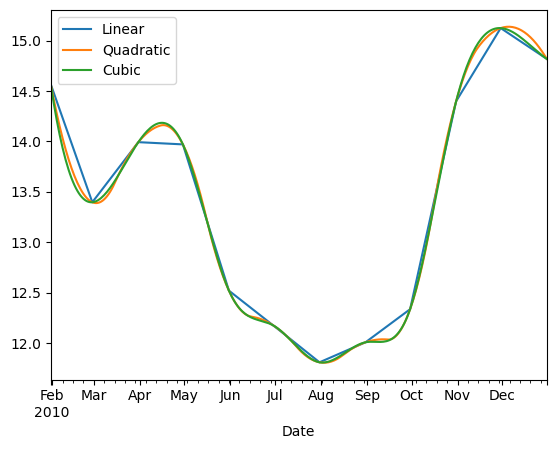

In [26]:
df_tmp.plot()

# Moving Windows

- `rolling()` - create a window and slide along, returning a Series as you go
- `expanding()` - gradually increase the size of your window

### Plot Moviong Averages

`Adj Close`

42 day moving average of `Adj Close`

252 day moving average of `Adj Close`

<Axes: xlabel='Date'>

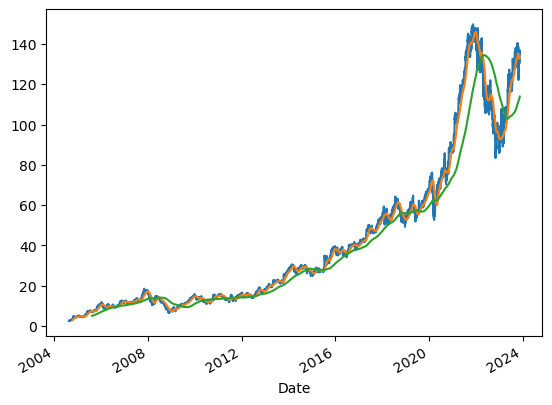

In [27]:
df_GOOGL['Adj Close'].plot()
df_GOOGL['Adj Close'].rolling(window=42).mean().plot()
df_GOOGL['Adj Close'].rolling(window=252).mean().plot()

### Plot Expanding WIndows

`Adj Close`

Expanding `Adj Close`


<Axes: xlabel='Date'>

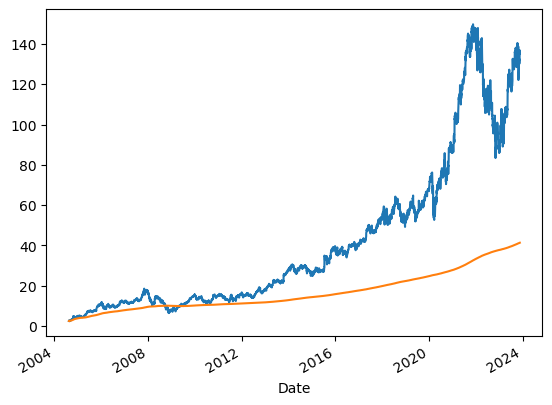

In [28]:
df_GOOGL['Adj Close'].plot()
df_GOOGL['Adj Close'].expanding().mean().plot()


## Aggregating Data

- Quite often you will want to resample and apply a function to the aggregate
- You have already done this, e.g. **df.resample(rule='BQ').mean()**
- A more convenient way is to use the `agg()` method and supply it with the name of the function you want to apply to your aggregate


### Calculate mean aggregated by year - Option 1 use `mean`

In [29]:
df_GOOGL.resample(rule='Y').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,3.79,3.87,3.73,3.80,3.80,"362,713,009.02"
2005-12-31,6.95,7.03,6.86,6.95,6.95,"427,139,068.29"
2006-12-31,10.31,10.42,10.17,10.29,10.29,"339,361,939.79"
2007-12-31,13.48,13.62,13.34,13.48,13.48,"217,342,885.77"
2008-12-31,11.67,11.87,11.43,11.63,11.63,"252,611,546.66"
2009-12-31,10.99,11.11,10.87,11.00,11.00,"140,225,967.00"
2010-12-31,13.42,13.54,13.28,13.40,13.40,"127,069,010.14"
2011-12-31,14.24,14.37,14.10,14.24,14.24,"123,005,664.86"
2012-12-31,16.09,16.22,15.94,16.09,16.09,"104,070,817.01"


### Calculate mean aggregated by year - Option 2 use `agg`

In [30]:
df_GOOGL.resample(rule='Y').agg('mean') 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,3.79,3.87,3.73,3.80,3.80,"362,713,009.02"
2005-12-31,6.95,7.03,6.86,6.95,6.95,"427,139,068.29"
2006-12-31,10.31,10.42,10.17,10.29,10.29,"339,361,939.79"
2007-12-31,13.48,13.62,13.34,13.48,13.48,"217,342,885.77"
2008-12-31,11.67,11.87,11.43,11.63,11.63,"252,611,546.66"
2009-12-31,10.99,11.11,10.87,11.00,11.00,"140,225,967.00"
2010-12-31,13.42,13.54,13.28,13.40,13.40,"127,069,010.14"
2011-12-31,14.24,14.37,14.10,14.24,14.24,"123,005,664.86"
2012-12-31,16.09,16.22,15.94,16.09,16.09,"104,070,817.01"


### Use a variable to store the name of the function

In [31]:
func = 'mean'
df_GOOGL.resample(rule='Y').agg(func)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,3.79,3.87,3.73,3.80,3.80,"362,713,009.02"
2005-12-31,6.95,7.03,6.86,6.95,6.95,"427,139,068.29"
2006-12-31,10.31,10.42,10.17,10.29,10.29,"339,361,939.79"
2007-12-31,13.48,13.62,13.34,13.48,13.48,"217,342,885.77"
2008-12-31,11.67,11.87,11.43,11.63,11.63,"252,611,546.66"
2009-12-31,10.99,11.11,10.87,11.00,11.00,"140,225,967.00"
2010-12-31,13.42,13.54,13.28,13.40,13.40,"127,069,010.14"
2011-12-31,14.24,14.37,14.10,14.24,14.24,"123,005,664.86"
2012-12-31,16.09,16.22,15.94,16.09,16.09,"104,070,817.01"


### Aggregate by `mean`, `max` and `min`

In [32]:
funcs = ['mean', 'max', 'min']
df_GOOGL.resample(rule='Y').agg(funcs)

Open                High                 Low               Close  \
             mean    max   min   mean    max   min   mean    max   min   mean   
Date                                                                            
2004-12-31   3.79   4.99  2.48   3.87   5.05  2.55   3.73   4.84  2.40   3.80   
2005-12-31   6.95  10.85  4.39   7.03  11.17  4.46   6.86  10.73  4.32   6.95   
2006-12-31  10.31  12.79  8.44  10.42  12.84  8.55  10.17  12.66  8.30  10.29   
2007-12-31  13.48  18.55 10.94  13.62  18.70 11.15  13.34  18.14 10.94  13.48   
2008-12-31  11.67  17.34  6.57  11.87  17.45  6.74  11.43  16.96  6.19  11.63   
2009-12-31  10.99  15.63  7.22  11.11  15.67  7.49  10.87  15.52  7.08  11.00   
2010-12-31  13.42  15.77 10.97  13.54  15.79 11.07  13.28  15.62 10.85  13.40   
2011-12-31  14.24  16.08 11.86  14.37  16.19 12.03  14.10  16.07 11.84  14.24   
2012-12-31  16.09  19.29 14.02  16.22  19.38 14.13  15.94  19.14 13.93  16.09   
2013-12-31  22.11  28.04 17.63  22.28  28.05 17.65  21.96  27.85 17.41  22.13   
2014-12-31  28.45  30.70 24.99  28.64  30.75 25.45  28.17  30.50 24.86  28.41   
2015-12-31  31.00  39.70 24.96  31.28  39.93 25.01  30.70  39.36 24.55  31.00   
2016-12-31  38.18  41.92 34.12  38.47  41.95 34.17  37.85  41.45 33.63  38.16   
2017-12-31  46.97  54.15 40.03  47.26  54.32 40.57  46.66  53.61 39.84  46.99   
2018-12-31  56.13  64.46 49.22  56.75  64.57 50.61  55.47  63.15 48.88  56.10   
2019-12-31  59.51  68.20 51.36  59.99  68.35 52.50  59.06  67.65 51.12  59.56   
2020-12-31  73.88  91.03 52.82  74.83  92.19 53.35  72.98  90.85 50.44  73.95   
2021-12-31 124.15 149.98 85.01 125.26 150.97 87.20 123.03 148.90 84.81 124.22   
2022-12-31 114.88 151.25 85.40 116.48 151.55 86.52 113.20 145.52 83.34 114.76   
2023-12-31 116.40 141.05 85.98 117.90 141.22 87.57 115.25 138.58 84.86 116.66   

                        Adj Close                      Volume              \
              max   min      mean    max   min           mean         max   
Date                                                                        
2004-12-31   4.94  2.50      3.80   4.94  2.50 362,713,009.02  1474200324   
2005-12-31  10.81  4.38      6.95  10.81  4.38 427,139,068.29  1540945512   
2006-12-31  12.75  8.43     10.29  12.75  8.43 339,361,939.79  1643023332   
2007-12-31  18.56 10.98     13.48  18.56 10.98 217,342,885.77   710181108   
2008-12-31  17.15  6.44     11.63  17.15  6.44 252,611,546.66   930560508   
2009-12-31  15.59  7.08     11.00  15.59  7.08 140,225,967.00   428882688   
2010-12-31  15.68 10.91     13.40  15.68 10.91 127,069,010.14   592399008   
2011-12-31  16.16 11.88     14.24  16.16 11.88 123,005,664.86   561186252   
2012-12-31  19.22 13.99     16.09  19.22 13.99 104,070,817.01   497198304   
2013-12-31  28.05 17.59     22.13  28.05 17.59  83,412,535.71   462193344   
2014-12-31  30.53 24.91     28.41  30.53 24.91  53,328,169.62   222429348   
2015-12-31  39.70 24.85     31.00  39.70 24.85  43,396,365.08   257162000   
2016-12-31  41.79 34.06     38.16  41.79 34.06  39,381,277.78   140798000   
2017-12-31  54.25 40.39     46.99  54.25 40.39  32,342,717.13   118672000   
2018-12-31  64.28 49.23     56.10  64.28 49.23  40,919,314.74   128220000   
2019-12-31  68.12 51.27     59.56  68.12 51.27  30,260,753.97   133178000   
2020-12-31  91.25 52.71     73.95  91.25 52.71  39,953,114.62   108358000   
2021-12-31 149.84 86.14    124.22 149.84 86.14  30,513,936.51    97882000   
2022-12-31 148.00 83.43    114.76 148.00 83.43  34,767,530.28   123200000   
2023-12-31 140.55 86.20    116.66 140.55 86.20  33,225,337.84   119455000   

                       
                  min  
Date                   
2004-12-31   81234684  
2005-12-31  109574316  
2006-12-31   69238692  
2007-12-31   65070864  
2008-12-31   76783140  
2009-12-31   34313652  
2010-12-31   39540420  
2011-12-31   52011936  
2012-12-31   33602364  
2013-12-31   29338632  
2014-12-31   14754000  
2015-12-31   10412000  
2016-12-31   1227

### More sophisticated aggregations

Functions
- 'mean', 'max', 'min'


Columns
- 'High', 'Low'


Date Range
- 2016 to 2017


Period
- Business Quarter

In [33]:
funcs = ['mean', 'max', 'min']
cols = ['High', 'Low']
from_date = '2016'
to_date = '2017'
freq = 'BQ'

# And now only for 2016 to 2017 but for Business Quarter
df_GOOGL[from_date:to_date][cols].resample(rule=freq).agg(funcs)


High               Low            
            mean   max   min  mean   max   min
Date                                          
2016-03-31 37.25 40.52 35.23 36.38 39.03 34.10
2016-06-30 36.98 39.55 34.17 36.42 38.88 33.63
2016-09-30 39.29 40.95 35.41 38.85 40.64 34.95
2016-12-30 40.33 41.95 38.53 39.70 41.45 37.18
2017-03-31 42.23 43.72 40.57 41.78 43.42 39.84
2017-06-30 47.06 50.43 42.19 46.43 49.83 41.73
2017-09-29 47.71 50.31 46.41 47.09 49.51 45.77
2017-12-29 51.96 54.32 48.62 51.26 53.61 48.10

### Same as above but transpose results

In [34]:
df_GOOGL[from_date:to_date][cols].resample(rule=freq).agg(funcs).transpose()


Date       2016-03-31  2016-06-30  2016-09-30  2016-12-30  2017-03-31  \
High mean       37.25       36.98       39.29       40.33       42.23   
     max        40.52       39.55       40.95       41.95       43.72   
     min        35.23       34.17       35.41       38.53       40.57   
Low  mean       36.38       36.42       38.85       39.70       41.78   
     max        39.03       38.88       40.64       41.45       43.42   
     min        34.10       33.63       34.95       37.18       39.84   

Date       2017-06-30  2017-09-29  2017-12-29  
High mean       47.06       47.71       51.96  
     max        50.43       50.31       54.32  
     min        42.19       46.41       48.62  
Low  mean       46.43       47.09       51.26  
     max        49.83       49.51       53.61  
     min        41.73       45.77       48.10